In [1]:
import pandas as pd

df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

1. Imports pandas with the standard alias `pd`
2. Loads two CSV files:
   - winequality-red.csv containing red wine data
   - winequality-white.csv containing white wine data
3. Creates two pandas DataFrames to store the data

In [2]:
# Add a new column to each dataframe to indicate the type of wine
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine the dataframes
dataset = pd.concat([df_red, df_white], ignore_index=True)

# Display the combined dataframe
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


#### Adding Wine Type Labels
The code begins by adding a categorical label to distinguish between red and white wines in their respective DataFrames. This creates a new column called 'type' in each DataFrame:
- For `df_red`, every row gets labeled as 'red'
- For `df_white`, every row gets labeled as 'white'

#### Combining the Datasets
The `pd.concat()` function is used to merge both DataFrames vertically (stacking rows):
- Takes a list of DataFrames `[df_red, df_white]` as input
- `ignore_index=True` parameter resets the index to avoid duplicate index values
- Creates a new DataFrame `dataset` containing all rows from both wine datasets

#### Previewing Results
`dataset.head(10)` displays the first 10 rows of the combined DataFrame, which helps verify:
- The merge operation was successful
- The 'type' column is present and properly populated
- Data from both wine types is included

In [3]:
dataset['type'] = dataset['type'].map({'red': 0, 'white': 1})

This code transforms the categorical 'type' column in the wine dataset from string values ('red' and 'white') to numerical values (0 and 1). This transformation is necessary because many machine learning algorithms require numerical inputs rather than categorical strings.

The code uses pandas' `map()` method which applies a mapping dictionary to transform values:
- The 'type' column is accessed using `dataset['type']`
- A dictionary `{'red': 0, 'white': 1}` defines the mapping:
  - 'red' wine becomes 0
  - 'white' wine becomes 1
- The result is assigned back to the 'type' column, overwriting the original string values

In [4]:
# Display the dataset with the encoded type column
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [5]:
X = dataset.iloc[:, 0:12].values
y = dataset.iloc[:, -1].values

#### Data Separation
This code splits the wine dataset into two NumPy arrays - one for features and one for the target variable:

- Uses pandas' `iloc` indexer to select data by integer position
- Selects all rows (`:`) and columns 0 through 11 (`0:12`)
- `.values` converts the selection to a NumPy array
- Contains wine characteristics including things like acidity, pH, etc.

- Selects all rows and only the last column (`-1`)
- `.values` converts to NumPy array
- Contains the wine color or classifications

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and remaining data (30% of the original data)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data into validation and test sets (each 15% of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the sizes of the splits
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 4547
Validation set size: 975
Test set size: 975


The code uses scikit-learn's `train_test_split` function to perform a two-stage split of the dataset, creating training, validation, and test sets. This is a crucial step in machine learning to properly evaluate model performance.

#### First Split


This line splits the data into:
- Training data (70%): Stored in `X_train` and `y_train`
- Temporary data (30%): Stored in `X_temp` and `y_temp`
- Uses `random_state=42` for reproducibility
- The `test_size=0.3` parameter specifies that 30% goes to temporary data

#### Second Split


This line further divides the temporary data:
- Validation data (15% of original): Stored in `X_val` and `y_val`
- Test data (15% of original): Stored in `X_test` and `y_test`
- Uses same random state for consistency
- `test_size=0.5` splits temp data equally

#### Size Verification


The `.shape[0]` attribute gets the number of rows.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

The code performs standardization of the training data through three key steps:

1. **Import and Initialization**


This imports the `StandardScaler` class and creates a new scaler instance with default parameters:
- `with_mean=True`: Centers the data by subtracting the mean
- `with_std=True`: Scales to unit variance by dividing by standard deviation
- `copy=True`: Creates a copy rather than modifying data in-place

2. **Standardization**


This line performs two operations in one step:
- `fit()`: Learns the mean and standard deviation of each feature
- `transform()`: Applies the standardization using formula: `z = (x - u) / s`
  where `u` is the mean and `s` is the standard deviation

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

This imports the LogisticRegression class from scikit-learn's linear model module. Logistic Regression is a popular classification algorithm that predicts the probability of categorical outcomes.

**Model Initialization**:


This creates a new LogisticRegression instance with default parameters except for `random_state`:
- Uses L2 regularization (Ridge) by default
- Default solver is 'lbfgs'
- `random_state=0` ensures reproducible results
- Default maximum iterations is 100
- Default tolerance is 1e-4

In [9]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Training the Model

The `fit()` method trains the Logistic Regression classifier using the provided training data:

- `X_train`: The feature matrix containing standardized training data
- `y_train`: The target variable containing binary labels (0 for red wine, 1 for white wine)

During training, the model:
1. Learns the optimal coefficients (weights) for each feature
2. Adjusts the intercept term (bias)
3. Uses the 'lbfgs' optimizer by default to minimize the loss function
4. Applies L2 regularization to prevent overfitting

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Transform validation data using the same scaler
X_val_scaled = sc.transform(X_val)

# Get predictions on validation set
y_val_pred = model.predict(X_val_scaled)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

Confusion Matrix:
[[245   8]
 [  7 715]]

Validation Accuracy: 0.9846


This code evaluates the performance of a logistic regression model on the validation dataset using scikit-learn's metrics.

#### Importing Metrics
The code begins by importing two essential evaluation functions from scikit-learn's metrics module:
- `accuracy_score`: Calculates the proportion of correct predictions.
- `confusion_matrix`: Creates a matrix showing the counts of true positives, true negatives, false positives, and false negatives.

#### Data Transformation
The validation features are standardized using the same scaler that was fitted on the training data:
- `X_val_scaled = sc.transform(X_val)`: This line ensures that the validation data is on the same scale as the training data by applying the previously fitted scaler.

#### Making Predictions
The trained logistic regression model generates predictions for the validation data:
- `y_val_pred = model.predict(X_val_scaled)`: This line uses the model to predict class labels (0 or 1) for each sample in the validation set.

#### Performance Evaluation
The code then evaluates the model's performance using two metrics:

1. **Confusion Matrix**
   - `print("Confusion Matrix:")`: Prints a header for the confusion matrix.
   - `print(confusion_matrix(y_val, y_val_pred))`: Prints the confusion matrix, which provides a detailed breakdown of the model's performance by showing the counts of true positives, true negatives, false positives, and false negatives.

2. **Accuracy Score**
   - `val_accuracy = accuracy_score(y_val, y_val_pred)`: Calculates the overall accuracy of the model on the validation set.
   - `print(f"\nValidation Accuracy: {val_accuracy:.4f}")`: Prints the accuracy score, formatted to four decimal places.

This code provides a comprehensive evaluation of the model's performance on the validation dataset by displaying both the confusion matrix and the accuracy score.

In [11]:
y_pred = model.predict(sc.transform(X_test))

This code generates predictions for the test dataset using a trained logistic regression model and a previously fitted scaler.

#### Data Transformation
The test features are standardized using the same scaler that was fitted on the training data:
- `sc.transform(X_test)`: This line applies the scaling transformation to the test data, ensuring that the test features are on the same scale as the training data. The `transform()` method uses the mean and standard deviation calculated from the training data to standardize the test data.

#### Making Predictions
The trained logistic regression model generates predictions for the standardized test data:
- `model.predict(...)`: This method uses the trained model to predict class labels (0 or 1) for each sample in the standardized test set. The `predict()` method returns the predicted class labels based on the learned coefficients and intercept of the logistic regression model.

#### Storing Predictions
The predicted class labels are stored in the variable `y_pred`:
- `y_pred = model.predict(sc.transform(X_test))`: This line combines the data transformation and prediction steps, storing the resulting class labels in the `y_pred` variable. The `y_pred` array will contain the predicted class labels for each sample in the test set.

This code ensures that the test data is standardized using the same parameters as the training data and then uses the trained logistic regression model to generate predictions for the test set. The predicted class labels are stored in the `y_pred` variable for further evaluation or analysis.

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[246,   3],
       [  3, 723]])

This code evaluates the performance of a classification model by generating a confusion matrix, which provides a detailed breakdown of the model's predictions compared to the actual labels.

#### Importing the Function
The code begins by importing the `confusion_matrix` function from scikit-learn's metrics module:
- `from sklearn.metrics import confusion_matrix`: This imports the function that will be used to create the confusion matrix.

#### Generating the Confusion Matrix
The confusion matrix is generated by comparing the true labels to the predicted labels:
- `confusion_matrix(y_test, y_pred)`: This function call takes two arguments:
  - `y_test`: The true labels for the test dataset.
  - `y_pred`: The predicted labels generated by the model for the test dataset.
- The function returns a 2x2 matrix for binary classification, where:
  - The rows represent the actual classes.
  - The columns represent the predicted classes.

#### Structure of the Confusion Matrix
For a binary classification problem with labels 0 and 1, the confusion matrix is structured as follows:


In [13]:
# [[TN, FP],
# [FN, TP]]

Where:
- `TN` (True Negatives): The number of samples correctly predicted as class 0.
- `FP` (False Positives): The number of samples incorrectly predicted as class 1.
- `FN` (False Negatives): The number of samples incorrectly predicted as class 0.
- `TP` (True Positives): The number of samples correctly predicted as class 1.

#### Interpretation
The confusion matrix provides a comprehensive view of the model's performance by showing how many predictions were correct and how many were incorrect for each class. It helps identify specific types of errors, such as false positives and false negatives, which can be useful for understanding the model's strengths and weaknesses.

In summary, this code generates a confusion matrix to evaluate the classification model's performance by comparing the true labels (`y_test`) with the predicted labels (`y_pred`). The resulting matrix provides a detailed breakdown of the model's prediction accuracy for each class.

In [14]:
# (246+723)/(246+723+3+3)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9938461538461538

This code evaluates the performance of a classification model by calculating the accuracy score, which measures the proportion of correct predictions.

#### Importing the Function
The code begins by importing the `accuracy_score` function from scikit-learn's metrics module:
- `from sklearn.metrics import accuracy_score`: This imports the function that will be used to calculate the accuracy score.

#### Calculating the Accuracy Score
The accuracy score is calculated by comparing the true labels to the predicted labels:
- `accuracy_score(y_test, y_pred)`: This function call takes two arguments:
  - `y_test`: The true labels for the test dataset.
  - `y_pred`: The predicted labels generated by the model for the test dataset.
- The function returns a float value representing the accuracy of the model.

#### Interpretation
The accuracy score is a measure of how often the model's predictions are correct. It is calculated as the ratio of the number of correct predictions to the total number of predictions:


Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

- A score of 1.0 indicates perfect accuracy, meaning all predictions are correct.
- A score of 0.0 indicates no correct predictions.

#### Key Points
- The accuracy score provides a single metric that summarizes the model's overall performance.
- It is particularly useful for balanced datasets where the classes are equally represented.
- For imbalanced datasets, accuracy alone might be misleading, as it does not account for the distribution of classes.

In summary, this code calculates the accuracy score to evaluate the classification model's performance by comparing the true labels (`y_test`) with the predicted labels (`y_pred`). The resulting score provides a measure of the proportion of correct predictions made by the model.

In [16]:
from sklearn.metrics import classification_report, roc_auc_score

# Print detailed classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Red Wine', 'White Wine']))

# Calculate and print ROC AUC score
auc = roc_auc_score(y_test, y_pred)
print(f"\nROC AUC Score: {auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

    Red Wine       0.99      0.99      0.99       249
  White Wine       1.00      1.00      1.00       726

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975


ROC AUC Score: 0.9919


This code evaluates the performance of a classification model using detailed metrics and the ROC AUC score.

#### Importing Metrics
The code begins by importing two essential evaluation functions from scikit-learn's metrics module:
- `classification_report`: Generates a detailed text report showing precision, recall, F1-score, and support for each class.
- `roc_auc_score`: Calculates the Area Under the Receiver Operating Characteristic Curve (ROC AUC), which measures the model's ability to distinguish between classes.

#### Printing the Classification Report
The classification report provides a comprehensive overview of the model's performance for each class:
- `print("Classification Report:")`: Prints a header for the classification report.
- `print(classification_report(y_test, y_pred, target_names=['Red Wine', 'White Wine']))`: Generates and prints the classification report. The `classification_report` function takes the following arguments:
  - `y_test`: The true labels for the test dataset.
  - `y_pred`: The predicted labels generated by the model for the test dataset.
  - `target_names`: Custom names for the classes, in this case, 'Red Wine' and 'White Wine'.
- The report includes the following metrics for each class:
  - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
  - **Recall**: The ratio of correctly predicted positive observations to the all observations in the actual class.
  - **F1-score**: The weighted average of precision and recall.
  - **Support**: The number of actual occurrences of the class in the dataset.

#### Calculating and Printing the ROC AUC Score
The ROC AUC score provides a single metric that summarizes the model's ability to distinguish between classes:
- `auc = roc_auc_score(y_test, y_pred)`: Calculates the ROC AUC score by comparing the true labels (`y_test`) with the predicted labels (`y_pred`). The ROC AUC score ranges from 0.0 to 1.0, with 1.0 indicating perfect classification and 0.5 indicating random guessing.
- `print(f"\nROC AUC Score: {auc:.4f}")`: Prints the ROC AUC score, formatted to four decimal places.

#### Interpretation
- The classification report provides detailed insights into the model's performance for each class, helping to identify strengths and weaknesses.
- The ROC AUC score offers a single metric that summarizes the model's overall ability to distinguish between the classes, which is particularly useful for evaluating binary classifiers.

In summary, this code generates a comprehensive evaluation of the classification model's performance by printing a detailed classification report and calculating the ROC AUC score. These metrics provide valuable insights into the model's accuracy, precision, recall, and overall discriminative ability.

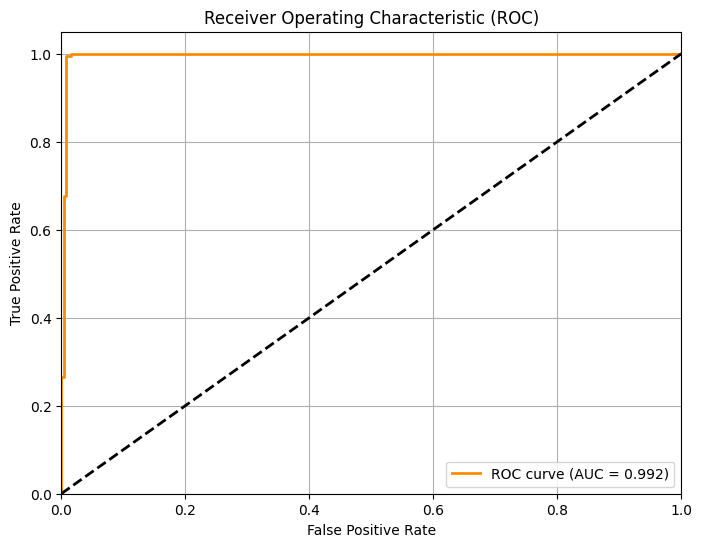

In [17]:
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(sc.transform(X_test))[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

This code generates and visualizes the Receiver Operating Characteristic (ROC) curve for a classification model, providing insights into the model's performance.

#### Importing Libraries
The code begins by importing necessary functions and libraries:
- `roc_curve` from scikit-learn's metrics module: Used to calculate the ROC curve.
- `matplotlib.pyplot` as `plt`: Used for plotting the ROC curve.

#### Calculating the ROC Curve
The ROC curve is calculated by comparing the true labels with the predicted probabilities:
- `fpr, tpr, _ = roc_curve(y_test, model.predict_proba(sc.transform(X_test))[:, 1])`: This line calculates the false positive rate (FPR) and true positive rate (TPR) for various threshold settings. It involves:
  - `sc.transform(X_test)`: Standardizing the test features using the previously fitted scaler.
  - `model.predict_proba(...)`: Generating predicted probabilities for each class.
  - `[:, 1]`: Selecting the probabilities for the positive class (e.g., white wine).
  - `roc_curve(y_test, ...)`: Comparing the true labels (`y_test`) with the predicted probabilities to calculate FPR and TPR.

#### Plotting the ROC Curve
The ROC curve is plotted to visualize the model's performance:
- `plt.figure(figsize=(8, 6))`: Creates a new figure with specified dimensions (8x6 inches).
- `plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.3f})')`: Plots the ROC curve with:
  - `fpr` on the x-axis.
  - `tpr` on the y-axis.
  - `color='darkorange'`: Sets the line color to dark orange.
  - `lw=2`: Sets the line width to 2.
  - `label=f'ROC curve (AUC = {auc:.3f})'`: Adds a label with the AUC score formatted to three decimal places.
- `plt.plot([0, 1], [0, 1], 'k--', lw=2)`: Adds a diagonal reference line representing random guessing.
- `plt.xlim([0.0, 1.0])`: Sets the x-axis limits from 0.0 to 1.0.
- `plt.ylim([0.0, 1.05])`: Sets the y-axis limits from 0.0 to 1.05.

#### Interpretation
- The ROC curve shows the trade-off between the true positive rate and false positive rate at various threshold settings.
- A curve closer to the top-left corner indicates better performance.
- The diagonal line represents random guessing (AUC = 0.5).
- The AUC score in the legend provides a single metric summarizing the model's ability to distinguish between classes.

In summary, this code calculates and visualizes the ROC curve, providing a comprehensive view of the model's performance in distinguishing between the classes.